In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" # Don't run, too costo

# TP -  Introduction to Pytorch


## Tensors, Back-propagation, Hand-written digit recognition,  Language modeling
*************************************************************

**Recommended Reading:**

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [3]:
import torch

a = torch.FloatTensor(2, 3)
print(a)
print(a.mean())


 1.7355e+05  4.5834e-41  3.1083e-37
 0.0000e+00  4.4842e-44  0.0000e+00
[torch.FloatTensor of size 2x3]

28924.9375


### are Numpy arrays inside

In [5]:
a_ = a.numpy()
a_[0, 1] = 0.

print(a)


1.00000e-19 *
 -1.6690  0.0000  0.0000
  0.0000  0.0000  0.0000
[torch.FloatTensor of size 2x3]



## Variables

In [4]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



### are Tensors inside

In [2]:
print(x.data)

NameError: name 'x' is not defined

### with automatic differentiation !

In [7]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [9]:
print(x.grad)

error = (10 - z).mean()
error.backward()

print(x.grad)

None
Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [10]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)
h = torch.sigmoid(w * x + b)
error = (y - h)**2
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


On minimize $L(y - h(x))$ pas à pas:

In [7]:
alpha02 = 0.2

def entraine (alpha):
    # Initialisation
    x = Variable(torch.Tensor([1.5]))
    y = Variable(torch.Tensor([0.2]))
    b = Variable(torch.Tensor([-2.0]), requires_grad=True)
    w = Variable(torch.Tensor([3.0]), requires_grad=True)
    
    # Entrainement
    for i in range(100):
        h = torch.sigmoid(w * x + b)
        error = (y - h)**2
        error.backward()
    
        w.data.sub_(alpha * w.grad.data)
        w.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass
    
        print('Epoch {} h={:.05f} w={:.05f} b={:.05f};'.format(i+1, h.data[0], w.data[0], b.data[0]))

entraine(alpha02)    

Epoch 1 h=0.92414 w=2.96954 b=-2.02031
Epoch 2 h=0.91938 w=2.93755 b=-2.04163
Epoch 3 h=0.91409 w=2.90391 b=-2.06406
Epoch 4 h=0.90820 w=2.86848 b=-2.08768
Epoch 5 h=0.90159 w=2.83113 b=-2.11258
Epoch 6 h=0.89417 w=2.79172 b=-2.13886
Epoch 7 h=0.88582 w=2.75010 b=-2.16660
Epoch 8 h=0.87637 w=2.70613 b=-2.19591
Epoch 9 h=0.86568 w=2.65968 b=-2.22688
Epoch 10 h=0.85354 w=2.61067 b=-2.25956
Epoch 11 h=0.83976 w=2.55901 b=-2.29399
Epoch 12 h=0.82412 w=2.50474 b=-2.33018
Epoch 13 h=0.80642 w=2.44794 b=-2.36804
Epoch 14 h=0.78648 w=2.38884 b=-2.40744
Epoch 15 h=0.76420 w=2.32784 b=-2.44810
Epoch 16 h=0.73956 w=2.26549 b=-2.48968
Epoch 17 h=0.71270 w=2.20250 b=-2.53167
Epoch 18 h=0.68397 w=2.13973 b=-2.57351
Epoch 19 h=0.65387 w=2.07810 b=-2.61460
Epoch 20 h=0.62306 w=2.01848 b=-2.65434
Epoch 21 h=0.59228 w=1.96165 b=-2.69224
Epoch 22 h=0.56223 w=1.90815 b=-2.72790
Epoch 23 h=0.53353 w=1.85835 b=-2.76110
Epoch 24 h=0.50661 w=1.81237 b=-2.79176
Epoch 25 h=0.48171 w=1.77017 b=-2.81989
Epoch 26 

Essayez différentes valeurs pour le paramètre alpha: 0.01, 0.1, 1, 10, 100. Que constatez-vous ?

In [8]:
entraine(0.01)

Epoch 1 h=0.92414 w=2.99848 b=-2.00102
Epoch 2 h=0.92391 w=2.99695 b=-2.00203
Epoch 3 h=0.92368 w=2.99542 b=-2.00305
Epoch 4 h=0.92344 w=2.99389 b=-2.00408
Epoch 5 h=0.92321 w=2.99235 b=-2.00510
Epoch 6 h=0.92297 w=2.99081 b=-2.00613
Epoch 7 h=0.92273 w=2.98926 b=-2.00716
Epoch 8 h=0.92249 w=2.98771 b=-2.00819
Epoch 9 h=0.92225 w=2.98616 b=-2.00923
Epoch 10 h=0.92201 w=2.98460 b=-2.01027
Epoch 11 h=0.92177 w=2.98304 b=-2.01131
Epoch 12 h=0.92152 w=2.98147 b=-2.01235
Epoch 13 h=0.92128 w=2.97990 b=-2.01340
Epoch 14 h=0.92103 w=2.97833 b=-2.01445
Epoch 15 h=0.92078 w=2.97675 b=-2.01550
Epoch 16 h=0.92053 w=2.97517 b=-2.01655
Epoch 17 h=0.92028 w=2.97359 b=-2.01761
Epoch 18 h=0.92003 w=2.97200 b=-2.01867
Epoch 19 h=0.91978 w=2.97040 b=-2.01973
Epoch 20 h=0.91952 w=2.96881 b=-2.02080
Epoch 21 h=0.91927 w=2.96720 b=-2.02186
Epoch 22 h=0.91901 w=2.96560 b=-2.02293
Epoch 23 h=0.91875 w=2.96399 b=-2.02401
Epoch 24 h=0.91849 w=2.96237 b=-2.02508
Epoch 25 h=0.91823 w=2.96076 b=-2.02616
Epoch 26 

In [9]:
entraine (100)

Epoch 1 h=0.92414 w=-12.22951 b=-12.15301
Epoch 2 h=0.00000 w=-12.22951 b=-12.15301
Epoch 3 h=0.00000 w=-12.22951 b=-12.15301
Epoch 4 h=0.00000 w=-12.22951 b=-12.15301
Epoch 5 h=0.00000 w=-12.22951 b=-12.15301
Epoch 6 h=0.00000 w=-12.22951 b=-12.15301
Epoch 7 h=0.00000 w=-12.22951 b=-12.15301
Epoch 8 h=0.00000 w=-12.22951 b=-12.15301
Epoch 9 h=0.00000 w=-12.22951 b=-12.15301
Epoch 10 h=0.00000 w=-12.22951 b=-12.15301
Epoch 11 h=0.00000 w=-12.22951 b=-12.15301
Epoch 12 h=0.00000 w=-12.22951 b=-12.15301
Epoch 13 h=0.00000 w=-12.22951 b=-12.15301
Epoch 14 h=0.00000 w=-12.22951 b=-12.15301
Epoch 15 h=0.00000 w=-12.22951 b=-12.15301
Epoch 16 h=0.00000 w=-12.22951 b=-12.15301
Epoch 17 h=0.00000 w=-12.22951 b=-12.15301
Epoch 18 h=0.00000 w=-12.22951 b=-12.15301
Epoch 19 h=0.00000 w=-12.22951 b=-12.15301
Epoch 20 h=0.00000 w=-12.22951 b=-12.15301
Epoch 21 h=0.00000 w=-12.22951 b=-12.15301
Epoch 22 h=0.00000 w=-12.22951 b=-12.15301
Epoch 23 h=0.00000 w=-12.22951 b=-12.15301
Epoch 24 h=0.00000 w

In [10]:
entraine (1)

Epoch 1 h=0.92414 w=2.84770 b=-2.10153
Epoch 2 h=0.89753 w=2.65524 b=-2.22984
Epoch 3 h=0.85233 w=2.40893 b=-2.39404
Epoch 4 h=0.77195 w=2.10687 b=-2.59542
Epoch 5 h=0.63758 w=1.80353 b=-2.79765
Epoch 6 h=0.47693 w=1.59628 b=-2.93582
Epoch 7 h=0.36786 w=1.47917 b=-3.01388
Epoch 8 h=0.31107 w=1.40777 b=-3.06149
Epoch 9 h=0.27892 w=1.36015 b=-3.09323
Epoch 10 h=0.25865 w=1.32641 b=-3.11572
Epoch 11 h=0.24488 w=1.30152 b=-3.13232
Epoch 12 h=0.23504 w=1.28261 b=-3.14492
Epoch 13 h=0.22776 w=1.26797 b=-3.15469
Epoch 14 h=0.22223 w=1.25644 b=-3.16237
Epoch 15 h=0.21794 w=1.24727 b=-3.16849
Epoch 16 h=0.21457 w=1.23990 b=-3.17340
Epoch 17 h=0.21189 w=1.23394 b=-3.17737
Epoch 18 h=0.20975 w=1.22910 b=-3.18060
Epoch 19 h=0.20801 w=1.22514 b=-3.18324
Epoch 20 h=0.20660 w=1.22189 b=-3.18541
Epoch 21 h=0.20545 w=1.21922 b=-3.18719
Epoch 22 h=0.20451 w=1.21702 b=-3.18865
Epoch 23 h=0.20373 w=1.21520 b=-3.18986
Epoch 24 h=0.20310 w=1.21370 b=-3.19087
Epoch 25 h=0.20257 w=1.21246 b=-3.19170
Epoch 26 

In [11]:
entraine (10)

Epoch 1 h=0.92414 w=1.47705 b=-3.01530
Epoch 2 h=0.31008 w=0.77054 b=-3.48631
Epoch 3 h=0.08863 w=1.04041 b=-3.30639
Epoch 4 h=0.14858 w=1.23555 b=-3.17630
Epoch 5 h=0.21033 w=1.18411 b=-3.21060
Epoch 6 h=0.19241 w=1.21950 b=-3.18700
Epoch 7 h=0.20460 w=1.19701 b=-3.20199
Epoch 8 h=0.19679 w=1.21223 b=-3.19185
Epoch 9 h=0.20205 w=1.20229 b=-3.19847
Epoch 10 h=0.19861 w=1.20895 b=-3.19403
Epoch 11 h=0.20091 w=1.20456 b=-3.19696
Epoch 12 h=0.19939 w=1.20749 b=-3.19501
Epoch 13 h=0.20040 w=1.20555 b=-3.19630
Epoch 14 h=0.19973 w=1.20684 b=-3.19544
Epoch 15 h=0.20018 w=1.20598 b=-3.19601
Epoch 16 h=0.19988 w=1.20655 b=-3.19563
Epoch 17 h=0.20008 w=1.20618 b=-3.19588
Epoch 18 h=0.19995 w=1.20643 b=-3.19572
Epoch 19 h=0.20003 w=1.20626 b=-3.19583
Epoch 20 h=0.19998 w=1.20637 b=-3.19575
Epoch 21 h=0.20002 w=1.20630 b=-3.19580
Epoch 22 h=0.19999 w=1.20635 b=-3.19577
Epoch 23 h=0.20001 w=1.20631 b=-3.19579
Epoch 24 h=0.20000 w=1.20633 b=-3.19578
Epoch 25 h=0.20000 w=1.20632 b=-3.19579
Epoch 26 

#### Conclusion
La longueur du pas de renouvellement joue un grand rôle dans la mise à jour. Un pas trop petit implique un temps d'entrainement trop important, alors qu'un pas trop grand peut dépasser les bonnes valeurs et risque de ne plus jamais pouvoir revenir (la fameuse _disparition de gradient_, un défaut de la fonction sigmoïde).  
  
Parmi les 6 valeurs essayées, la meilleure longueur de pas $\alpha$ dans le sens d'arrivée la plus rapide __de façon stable__ aux valeurs cherchées de $w$ et de $b$, et $10$ (à l'étape 26). $\alpha=1$ a besoin de 59 étapes. Les valeurs cherchées pour $w$ et $b$ sont respectivement $w=1.20633$ et $b=-3.19578$.

# A vous de jouer !

Voici un jeu de données synthetique.

In [16]:
import numpy as np
import torch

np.random.seed(1337)

X_ = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

On crée deux jeux séparés: train / test.

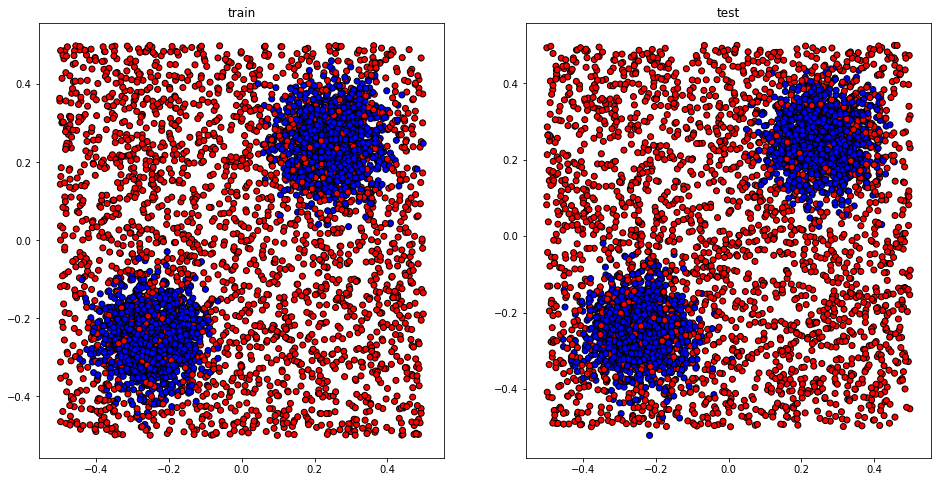

In [180]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 5000
n_test = 5000

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Implémentez un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

Multiplication de matrices: torch.matmul

Interdiction d'utiliser les modules haut niveau de pytorch ! (optim, nn etc.)

In [199]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

n_in = 2
params = []

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

# Juste pour essayer le produit vectoriel des Variables
print(W.data)
print(W.dot(W))
print(1.2582*1.2582+(0.2396*0.2396))


 1.2582
-0.2396
[torch.FloatTensor of size 2x1]

Variable containing:
 1.6405
[torch.FloatTensor of size 1]

1.6404754


In [200]:
def forward(X):
    H = torch.sigmoid(torch.mm(X, W) + b)
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 100 ## On entraine 250 fois à titre individuel.
epoch_n_batches = 10 ## A chaque fois, on fait 100 mini-batch indépendemment les uns
## les autres. C'est-à-dire possibilité d'effectifs non-équilibrés.
train_batch_size = 10 ## Chaque mini-batch est composé de 10 individus.
alpha = 0.02
alpha
for i in range(n_epochs):

    train_loss = 0.
    print("\n")
    print('Begin of epoch {} W={:.03f} b={:.03f} \n'.format(i, W.data[0][0], b.data[0]))

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        ## Echantillonne simplement 10 observations de 100.
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss_en_vecteur = L(Y_prob_mb, Y_mb)

        # Backward pass
        # print(loss_en_vecteur.data)
        loss = torch.sum(loss_en_vecteur) ## ou loss_en_vecteur.sum()
        loss.backward()
        
        print('Begin of minibatch {} loss={:.03f} W={:.03f} b={:.03f}'.format(j, loss.data[0], W.data[0][0], b.data[0]))
        # Parameter update (gradient descent)
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()  # must reset to 0 before next pass
        
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass
    
        print('End of minibatch {} loss={:.03f} W={:.03f} b={:.03f}'.format(j, loss.data[0], W.data[0][0], b.data[0]))


        train_loss += loss.data[0]
    # train_loss est après chaque étape la perte moyenne des 100 itérations indépendantes,
    # sans forcément qu'elle s'améliore de petit à petit comme dans le cas précédent.
    train_loss /= epoch_n_batches
    print('End of epoch {} W={:.03f} b={:.03f}'.format(i, W.data[0][0], b.data[0]))
    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))



Begin of epoch 0 W=1.258 b=0.000 

Begin of minibatch 0 loss=8.383 W=1.258 b=0.000
End of minibatch 0 loss=8.383 W=1.232 b=-0.003
Begin of minibatch 1 loss=7.650 W=1.232 b=-0.003
End of minibatch 1 loss=7.650 W=1.216 b=0.020
Begin of minibatch 2 loss=6.562 W=1.216 b=0.020
End of minibatch 2 loss=6.562 W=1.219 b=0.021
Begin of minibatch 3 loss=6.359 W=1.219 b=0.021
End of minibatch 3 loss=6.359 W=1.227 b=0.020
Begin of minibatch 4 loss=7.605 W=1.227 b=0.020
End of minibatch 4 loss=7.605 W=1.212 b=0.081
Begin of minibatch 5 loss=7.079 W=1.212 b=0.081
End of minibatch 5 loss=7.079 W=1.203 b=0.138
Begin of minibatch 6 loss=6.792 W=1.203 b=0.138
End of minibatch 6 loss=6.792 W=1.206 b=0.115
Begin of minibatch 7 loss=7.111 W=1.206 b=0.115
End of minibatch 7 loss=7.111 W=1.194 b=0.175
Begin of minibatch 8 loss=6.821 W=1.194 b=0.175
End of minibatch 8 loss=6.821 W=1.191 b=0.189
Begin of minibatch 9 loss=6.225 W=1.191 b=0.189
End of minibatch 9 loss=6.225 W=1.196 b=0.222
End of epoch 0 W=1.19

Begin of minibatch 7 loss=6.986 W=0.641 b=0.023
End of minibatch 7 loss=6.986 W=0.633 b=0.021
Begin of minibatch 8 loss=7.063 W=0.633 b=0.021
End of minibatch 8 loss=7.063 W=0.628 b=0.038
Begin of minibatch 9 loss=6.563 W=0.628 b=0.038
End of minibatch 9 loss=6.563 W=0.641 b=0.040
End of epoch 17 W=0.641 b=0.040
Epoch 018	train loss=6.917028	test loss=0.696858	0/1 error=0.470


Begin of epoch 18 W=0.641 b=0.040 

Begin of minibatch 0 loss=6.379 W=0.641 b=0.040
End of minibatch 0 loss=6.379 W=0.655 b=0.022
Begin of minibatch 1 loss=6.590 W=0.655 b=0.022
End of minibatch 1 loss=6.590 W=0.669 b=0.044
Begin of minibatch 2 loss=7.240 W=0.669 b=0.044
End of minibatch 2 loss=7.240 W=0.665 b=0.018
Begin of minibatch 3 loss=7.146 W=0.665 b=0.018
End of minibatch 3 loss=7.146 W=0.650 b=0.040
Begin of minibatch 4 loss=6.947 W=0.650 b=0.040
End of minibatch 4 loss=6.947 W=0.647 b=0.018
Begin of minibatch 5 loss=7.190 W=0.647 b=0.018
End of minibatch 5 loss=7.190 W=0.628 b=-0.002
Begin of minibatch

Begin of minibatch 8 loss=6.836 W=0.465 b=0.143
End of minibatch 8 loss=6.836 W=0.454 b=0.156
Begin of minibatch 9 loss=7.376 W=0.454 b=0.156
End of minibatch 9 loss=7.376 W=0.439 b=0.145
End of epoch 33 W=0.439 b=0.145
Epoch 034	train loss=6.883786	test loss=0.698399	0/1 error=0.400


Begin of epoch 34 W=0.439 b=0.145 

Begin of minibatch 0 loss=7.128 W=0.439 b=0.145
End of minibatch 0 loss=7.128 W=0.440 b=0.099
Begin of minibatch 1 loss=7.038 W=0.440 b=0.099
End of minibatch 1 loss=7.038 W=0.444 b=0.054
Begin of minibatch 2 loss=7.037 W=0.444 b=0.054
End of minibatch 2 loss=7.037 W=0.444 b=0.051
Begin of minibatch 3 loss=7.157 W=0.444 b=0.051
End of minibatch 3 loss=7.157 W=0.443 b=-0.012
Begin of minibatch 4 loss=6.945 W=0.443 b=-0.012
End of minibatch 4 loss=6.945 W=0.452 b=-0.012
Begin of minibatch 5 loss=6.758 W=0.452 b=-0.012
End of minibatch 5 loss=6.758 W=0.461 b=-0.031
Begin of minibatch 6 loss=7.184 W=0.461 b=-0.031
End of minibatch 6 loss=7.184 W=0.455 b=-0.052
Begin of min

Begin of minibatch 7 loss=7.073 W=0.326 b=-0.032
End of minibatch 7 loss=7.073 W=0.315 b=-0.032
Begin of minibatch 8 loss=7.059 W=0.315 b=-0.032
End of minibatch 8 loss=7.059 W=0.313 b=0.008
Begin of minibatch 9 loss=6.814 W=0.313 b=0.008
End of minibatch 9 loss=6.814 W=0.302 b=0.028
End of epoch 50 W=0.302 b=0.028
Epoch 051	train loss=7.036554	test loss=0.694383	0/1 error=0.384


Begin of epoch 51 W=0.302 b=0.028 

Begin of minibatch 0 loss=6.840 W=0.302 b=0.028
End of minibatch 0 loss=6.840 W=0.298 b=0.007
Begin of minibatch 1 loss=6.959 W=0.298 b=0.007
End of minibatch 1 loss=6.959 W=0.298 b=0.008
Begin of minibatch 2 loss=6.777 W=0.298 b=0.008
End of minibatch 2 loss=6.777 W=0.298 b=0.008
Begin of minibatch 3 loss=6.709 W=0.298 b=0.008
End of minibatch 3 loss=6.709 W=0.305 b=-0.010
Begin of minibatch 4 loss=7.000 W=0.305 b=-0.010
End of minibatch 4 loss=7.000 W=0.312 b=-0.049
Begin of minibatch 5 loss=7.056 W=0.312 b=-0.049
End of minibatch 5 loss=7.056 W=0.306 b=-0.026
Begin of mi

End of minibatch 0 loss=7.104 W=0.135 b=0.046
Begin of minibatch 1 loss=6.882 W=0.135 b=0.046
End of minibatch 1 loss=6.882 W=0.124 b=0.042
Begin of minibatch 2 loss=7.038 W=0.124 b=0.042
End of minibatch 2 loss=7.038 W=0.120 b=-0.001
Begin of minibatch 3 loss=6.888 W=0.120 b=-0.001
End of minibatch 3 loss=6.888 W=0.119 b=0.021
Begin of minibatch 4 loss=6.928 W=0.119 b=0.021
End of minibatch 4 loss=6.928 W=0.111 b=0.019
Begin of minibatch 5 loss=6.968 W=0.111 b=0.019
End of minibatch 5 loss=6.968 W=0.110 b=0.018
Begin of minibatch 6 loss=6.850 W=0.110 b=0.018
End of minibatch 6 loss=6.850 W=0.110 b=-0.041
Begin of minibatch 7 loss=6.937 W=0.110 b=-0.041
End of minibatch 7 loss=6.937 W=0.111 b=-0.059
Begin of minibatch 8 loss=7.011 W=0.111 b=-0.059
End of minibatch 8 loss=7.011 W=0.113 b=-0.016
Begin of minibatch 9 loss=7.049 W=0.113 b=-0.016
End of minibatch 9 loss=7.049 W=0.103 b=-0.015
End of epoch 68 W=0.103 b=-0.015
Epoch 069	train loss=6.965586	test loss=0.693613	0/1 error=0.489



End of minibatch 7 loss=6.781 W=0.150 b=0.167
Begin of minibatch 8 loss=7.219 W=0.150 b=0.167
End of minibatch 8 loss=7.219 W=0.139 b=0.137
Begin of minibatch 9 loss=6.961 W=0.139 b=0.137
End of minibatch 9 loss=6.961 W=0.140 b=0.131
End of epoch 83 W=0.140 b=0.131
Epoch 084	train loss=6.905963	test loss=0.696311	0/1 error=0.492


Begin of epoch 84 W=0.140 b=0.131 

Begin of minibatch 0 loss=7.018 W=0.140 b=0.131
End of minibatch 0 loss=7.018 W=0.131 b=0.123
Begin of minibatch 1 loss=6.673 W=0.131 b=0.123
End of minibatch 1 loss=6.673 W=0.132 b=0.157
Begin of minibatch 2 loss=7.601 W=0.132 b=0.157
End of minibatch 2 loss=7.601 W=0.136 b=0.087
Begin of minibatch 3 loss=6.999 W=0.136 b=0.087
End of minibatch 3 loss=6.999 W=0.137 b=0.063
Begin of minibatch 4 loss=6.803 W=0.137 b=0.063
End of minibatch 4 loss=6.803 W=0.138 b=0.100
Begin of minibatch 5 loss=7.025 W=0.138 b=0.100
End of minibatch 5 loss=7.025 W=0.134 b=0.094
Begin of minibatch 6 loss=6.944 W=0.134 b=0.094
End of minibatch 6 

#### Conclusion
Pas de convergence du tout. Car la fonction sigmoïde ne peut pas classifier un tel jeu de données.

In [201]:
## Essai de la fonction torch.multinomial(). En effet elle sert à échantillonner 10 
## obs parmi 100.
n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)

mb_idxs


 3596
   25
  706
 1783
 4133
 4533
 3802
  648
 1907
  935
[torch.LongTensor of size 10]

Visualisez la distribution apprise par votre modèle:

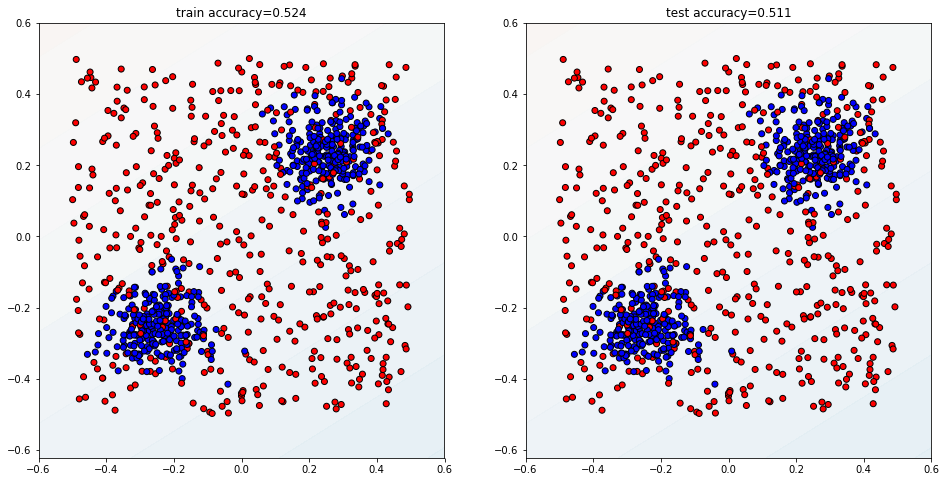

In [202]:
def drawPoints():
    points_chosen = np.random.choice(n_test, 
                                   size=min(1000, n_test), replace=False)
#    print(points_chosen)
    map_size = (100, 100)
    x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                         np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
    X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

    Y_prob_map = forward(Variable(X_map)).data

    Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
    train_err = torch.abs(Y_train - Y_train_pred).mean()

    Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
    axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
    axes[0, 0].contourf(
        x1,
        x2,
        Y_prob_map.numpy().reshape(map_size),
        cmap=cm, vmin=0, vmax=1,
        alpha=.8)
    axes[0, 0].scatter(
        X_test.numpy()[points_chosen, 0],
        X_test.numpy()[points_chosen, 1],
        c=Y_test.numpy()[points_chosen, 0],
        cmap=cm_bright,
        edgecolors='k')
    axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
    axes[0, 1].contourf(
        x1,
        x2,
        Y_prob_map.numpy().reshape(map_size),
        cmap=cm, vmin=0, vmax=1,
        alpha=.8)
    axes[0, 1].scatter(
        X_test.numpy()[points_chosen, 0],
        X_test.numpy()[points_chosen, 1],
        c=Y_test.numpy()[points_chosen, 0],
        cmap=cm_bright,
        edgecolors='k')
    plt.show()
    
drawPoints()

Ajoutez une couche cachée de taille 10 à votre réseau de neurones, avec la fonction d'activation relu.  
  
__Pour des raisons de calcul de la dérivée par l'ordinateur et d'interdiction d'utiliser les fonctions fournies par des modules genre _nn_, on remplace ici la fonction _ReLU_ par une de ses proches, la fonction _Softplus_ :__
$$ y = \frac{1}{\beta} * \log(1 + \exp\{\beta * x\}) $$
avec à peu près le même effet lorsque $\beta$ est grand (pas trop grand non plus sinon
ça va exploser facilement).

In [203]:
# TODO:
n_middle = 10

W1 = Variable(torch.normal(torch.zeros(n_in, n_middle), 
                          np.sqrt(2/(n_in + n_middle))), requires_grad=True)
b1 = Variable(torch.zeros(n_middle), requires_grad=True)

W2 = Variable(torch.normal(torch.zeros(n_middle, n_out), 
                           np.sqrt(2/(n_middle + n_out))), requires_grad=True)
b2 = Variable(torch.zeros(n_out), requires_grad=True)


beta = 2
def Softplus(X):
    spl = 1/beta * torch.log(1 + torch.exp(beta * X))
    return spl


def forward(X):
    H1 = Softplus(torch.mm(X, W1) + b1)

    H2 = torch.sigmoid(torch.mm(H1, W2) + b2)

    return H2


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelihood

    return loss.sum()




train_batch_size = 10 ## Chaque mini-batch est composé de 10 individus.
alpha = 0.02

train_set_length = X_train.shape[0]

Variable containing:
-0.3508  0.0619  0.1359 -0.4206  0.1723 -0.2123 -0.1326  0.1682 -0.4901 -0.3714
 0.3175 -0.1178 -0.3345  0.0225  0.1183  0.2649 -0.3276 -0.7161 -0.3286  0.1682
[torch.FloatTensor of size 2x10]
 
 Variable containing:
 0.0105
 0.5898
 0.4841
-0.1860
-0.2656
 0.2299
-0.4276
 0.0065
 0.5461
 0.0791
[torch.FloatTensor of size 10x1]
 
 Variable containing:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 10]
 
 Variable containing:
 0
[torch.FloatTensor of size 1]


1.00000e-03 *
  9.0750
[torch.FloatTensor of size 1]



In [142]:
X_train.shape[0]
# W.data
train_batch_size

10

In [204]:
n_epochs = 50

for i in range(n_epochs):

    train_loss = 0.

    index_shuffled = torch.randperm(train_set_length) # Shuffle the training set.
    X_train_shuffled = X_train[index_shuffled] 
    Y_train_shuffled = Y_train[index_shuffled]

    for j in range(-(-train_set_length // train_batch_size)): # Ceiling division.

        # Prepare next mini-batch
        X_mb = Variable(X_train_shuffled[(j*train_batch_size):
                                         min((j+1)*train_batch_size, train_set_length)])
        Y_mb = Variable(Y_train_shuffled[(j*train_batch_size):
                                         min((j+1)*train_batch_size, train_set_length)])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        loss = L(Y_prob_mb, Y_mb)

        # Backward pass
        loss.backward()

        # Parameter update (gradient descent)
        W1.data.sub_(alpha * W1.grad.data)
        W1.grad.data.zero_()  # must reset to 0 before next pass
        
        b1.data.sub_(alpha * b1.grad.data)
        b1.grad.data.zero_()  # must reset to 0 before next pass
        
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
        
        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]

    train_loss /= train_set_length

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test) / train_set_length
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))


Epoch 001	train loss=0.696488	test loss=0.710956	0/1 error=0.506
Epoch 002	train loss=0.693667	test loss=0.692089	0/1 error=0.506
Epoch 003	train loss=0.689130	test loss=0.678347	0/1 error=0.382
Epoch 004	train loss=0.656190	test loss=0.607023	0/1 error=0.227
Epoch 005	train loss=0.548352	test loss=0.494477	0/1 error=0.215
Epoch 006	train loss=0.470677	test loss=0.461546	0/1 error=0.218
Epoch 007	train loss=0.446090	test loss=0.444202	0/1 error=0.200
Epoch 008	train loss=0.438404	test loss=0.439521	0/1 error=0.203
Epoch 009	train loss=0.433484	test loss=0.447534	0/1 error=0.206
Epoch 010	train loss=0.431147	test loss=0.437413	0/1 error=0.203
Epoch 011	train loss=0.430961	test loss=0.434117	0/1 error=0.199
Epoch 012	train loss=0.427556	test loss=0.434287	0/1 error=0.199
Epoch 013	train loss=0.426828	test loss=0.436008	0/1 error=0.203
Epoch 014	train loss=0.426248	test loss=0.446200	0/1 error=0.207
Epoch 015	train loss=0.428595	test loss=0.437267	0/1 error=0.206
Epoch 016	train loss=0.42

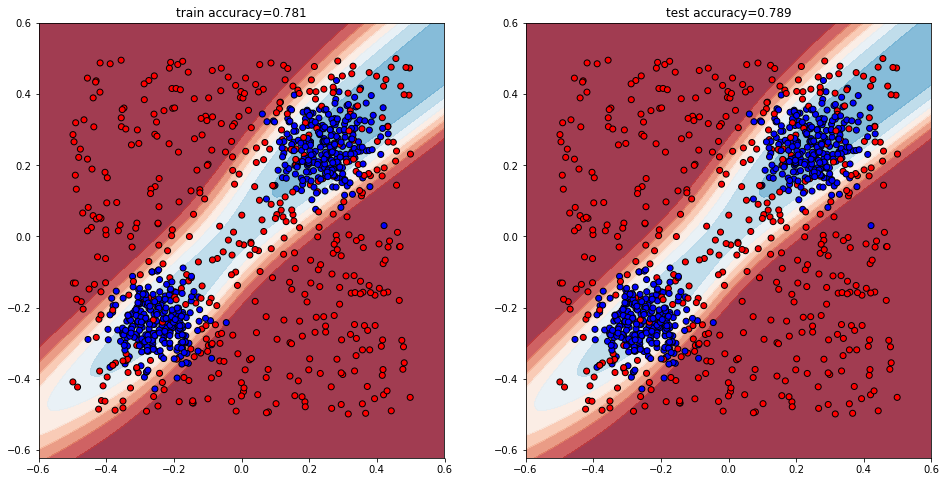

In [205]:
drawPoints()

Bonus: améliorez votre réseau de neurones: plus de neurones cachés, deuxième couche cachée etc.

In [222]:
# TODO:
n_middle_1 = 20
n_middle_2 = 20

W1 = Variable(torch.normal(torch.zeros(n_in, n_middle_1), 
                          np.sqrt(2/(n_in + n_middle_1))), requires_grad=True)
b1 = Variable(torch.zeros(n_middle_1), requires_grad=True)

W2 = Variable(torch.normal(torch.zeros(n_middle_1, n_middle_2), 
                           np.sqrt(2/(n_middle_1 + n_middle_2))), requires_grad=True)
b2 = Variable(torch.zeros(n_middle_2), requires_grad=True)

W3 = Variable(torch.normal(torch.zeros(n_middle_2, n_out), 
                           np.sqrt(2/(n_middle_2 + n_out))), requires_grad=True)
b3 = Variable(torch.zeros(n_out), requires_grad=True)

beta = 5

def Softplus(X):
    spl = 1/beta * torch.log(1 + torch.exp(beta * X))
    return spl

def forward(X):
    H1 = Softplus(torch.mm(X, W1) + b1)
    H2 = Softplus(torch.mm(H1, W2) + b2)
    H3 = torch.sigmoid(torch.mm(H2, W3) + b3)
    return H3

def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelihood

    return loss.sum()




train_batch_size = 10 ## Chaque mini-batch est composé de 10 individus.
alpha = 0.01

train_set_length = X_train.shape[0]


In [223]:
n_epochs = 100

for i in range(n_epochs):

    train_loss = 0.

    index_shuffled = torch.randperm(train_set_length) # Shuffle the training set.
    X_train_shuffled = X_train[index_shuffled] 
    Y_train_shuffled = Y_train[index_shuffled]

    for j in range(-(-train_set_length // train_batch_size)): # Ceiling division.

        # Prepare next mini-batch
        X_mb = Variable(X_train_shuffled[(j*train_batch_size):
                                         min((j+1)*train_batch_size, train_set_length)])
        Y_mb = Variable(Y_train_shuffled[(j*train_batch_size):
                                         min((j+1)*train_batch_size, train_set_length)])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        loss = L(Y_prob_mb, Y_mb)

        # Backward pass
        loss.backward()

        # Parameter update (gradient descent)
        W1.data.sub_(alpha * W1.grad.data)
        W1.grad.data.zero_()  # must reset to 0 before next pass
        
        b1.data.sub_(alpha * b1.grad.data)
        b1.grad.data.zero_()  # must reset to 0 before next pass
        
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
        
        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()  # must reset to 0 before next pass
        
        W3.data.sub_(alpha * W3.grad.data)
        W3.grad.data.zero_()  # must reset to 0 before next pass
        
        b3.data.sub_(alpha * b3.grad.data)
        b3.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]

    train_loss /= train_set_length

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test) / train_set_length
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))


Epoch 001	train loss=0.692457	test loss=0.687025	0/1 error=0.395
Epoch 002	train loss=0.669471	test loss=0.625066	0/1 error=0.276
Epoch 003	train loss=0.513766	test loss=0.451976	0/1 error=0.207
Epoch 004	train loss=0.442896	test loss=0.456385	0/1 error=0.208
Epoch 005	train loss=0.435073	test loss=0.446801	0/1 error=0.217
Epoch 006	train loss=0.432064	test loss=0.463862	0/1 error=0.221
Epoch 007	train loss=0.431316	test loss=0.437322	0/1 error=0.206
Epoch 008	train loss=0.430126	test loss=0.447082	0/1 error=0.210
Epoch 009	train loss=0.428833	test loss=0.435430	0/1 error=0.204
Epoch 010	train loss=0.428037	test loss=0.431554	0/1 error=0.200
Epoch 011	train loss=0.427492	test loss=0.432091	0/1 error=0.203
Epoch 012	train loss=0.427032	test loss=0.432129	0/1 error=0.202
Epoch 013	train loss=0.426455	test loss=0.432163	0/1 error=0.200
Epoch 014	train loss=0.424631	test loss=0.436741	0/1 error=0.207
Epoch 015	train loss=0.421163	test loss=0.428039	0/1 error=0.197
Epoch 016	train loss=0.42

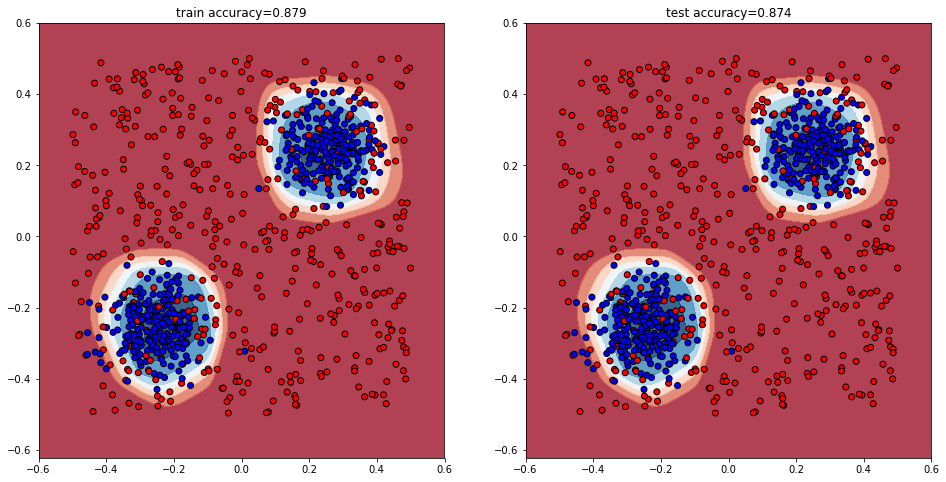

In [224]:
drawPoints()

# MNIST

Vous allez maintenant utiliser les fonctions haut niveau de pytorch: torch.nn, torch.optim etc.

On commence par charger les données:

In [226]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms

mnist_folder = './MNIST_data/'

train_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=True)
test_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=False)

Processing...
Done!


In [229]:
print("Nombre d'images dans le training set:", len(train_data))
print("Nombre d'images dans le test set:", len(test_data))

Nombre d'images dans le training set: 60000
Nombre d'images dans le test set: 10000


### Afficher quelques images

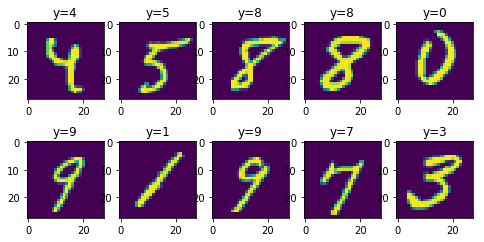

In [228]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4), squeeze=False)
seed = 123 # changer la seed pour afficher d'autres images

for i in range(10):
    r = i // 5
    c = i % 5
    np.random.seed(seed+i)
    idx = np.random.choice(len(train_data), 1)[0]
    x = train_data[idx][0].numpy()
    y = train_data[idx][1]
    axes[r, c].imshow(x[0, :, :])
    axes[r, c].set_title('y={}'.format(y))
    
plt.show()

### Modèle initial

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 1337
lr = 0.1
epochs = 25
train_batch_size = 50
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, X):
        X = X.view(-1, 28*28)  # flatten images
        X = self.fc1(X)
        return F.log_softmax(X)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))


Jouez avec les paramètres suivants:
- lr
- epochs
- train_batch_size

Quelle est la meilleure performance (0/1 error) que vous arrivez à atteindre?

## Améliorez votre modèle

Améliorez votre modèle afin de diminuer l'erreur sur le jeu de test. Essayez différentes architectures / hyperparamètres et à chaque fois reportez vos résultats.

Objectif: passer sous les 1% d'erreur: http://yann.lecun.com/exdb/mnist/

Pistes à essayer:
- plus de couches cachées
- convolutions + max pooling
- dropout
- couches résiduelles

Astuces:
- changer l'algorithme de descente de gradient (Adam)
- implémentez une stratégie d'early stopping: $n$ epochs sans amélioration -> arret
- implémentez une stratégie de diminution du learning rate: $n/2$ epochs sans amélioration -> $\alpha = \alpha / 2$ (torch.optim.lr_scheduler.ReduceLROnPlateau)

In [3]:
# TODO :

## NLP: N-Gram Language Modeling

Modèle NGram: sachant les mots $n$ précédents on veut prédire le prochain mot:

\begin{equation*}
P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
\end{equation*}

Où $w_i$ est le ième mot d'une phrase.

Veuillez considérer de modèle de prédiction de trigram suivant :

In [ ]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

### Utilisez vos propres valeurs pour context

In [78]:
# context = # TODO
context = ['own', 'deep']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['own', 'deep'] sunken


## CBOW: Continuous Bag-of-Words
CBOW = Prédire un mot sachant les mots d'avant et les mots d'après.

Exercice : en utilisant l'exemple précédent, codez un modèle CBOW.

In [110]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 10
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

class CBOW(nn.Module):

    def __init__(self):
        pass

    def forward(self, inputs):
        pass